In [3]:
# Loading IMDB dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Encoding labels
def encoded_labels(sequences, size=10000):
    results = np.zeros((len(sequences), size))
    for i, seq in enumerate(sequences):
        # Considering word indices within the specified size
        for j in seq:
            if j < size:
                results[i, j] = 1.0
    return results

x_train = encoded_labels(train_data)
x_test =encoded_labels(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

# Split a portion of the training data for validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def display_training(history, title="Model Performance"):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def model_variant(layer_config=[16, 16], activation_fn="relu",
                  loss_fn="binary_crossentropy", dropout=False, l2_reg=None):
    model = keras.Sequential()
    for units in layer_config:
        model.add(layers.Dense(units, activation=activation_fn,
                               kernel_regularizer=keras.regularizers.l2(l2_reg) if l2_reg else None))
        if dropout:
            model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss=loss_fn, metrics=["accuracy"])
    return model

In [6]:
print("Training Base Model (2 layers × 16 units)...")
base_net = model_variant()
base_hist = base_net.fit(partial_x_train, partial_y_train,
                         epochs=20, batch_size=512,
                         validation_data=(x_val, y_val), verbose=1)

Training Base Model (2 layers × 16 units)...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.7119 - loss: 0.6018 - val_accuracy: 0.7972 - val_loss: 0.4610
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8814 - loss: 0.3656 - val_accuracy: 0.8797 - val_loss: 0.3280
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9162 - loss: 0.2662 - val_accuracy: 0.8885 - val_loss: 0.2887
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9312 - loss: 0.2091 - val_accuracy: 0.8881 - val_loss: 0.2773
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9481 - loss: 0.1710 - val_accuracy: 0.8816 - val_loss: 0.2960
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9527 - loss: 0.1540 - val_accuracy: 0.8889 - val_loss: 0.2802
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9629 - loss: 0.1256 - val_accuracy: 0.8854 - val_loss: 0.2895
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0

In [7]:
print("One Hidden Layer")
one_layer = model_variant(layer_config=[16])
hist_one = one_layer.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                         validation_data=(x_val, y_val), verbose=1)

One Hidden Layer
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7010 - loss: 0.5801 - val_accuracy: 0.8650 - val_loss: 0.3961
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8933 - loss: 0.3420 - val_accuracy: 0.8798 - val_loss: 0.3292
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9192 - loss: 0.2633 - val_accuracy: 0.8808 - val_loss: 0.3035
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9263 - loss: 0.2267 - val_accuracy: 0.8722 - val_loss: 0.3072
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9378 - loss: 0.1949 - val_accuracy: 0.8888 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9480 - loss: 0.1711 - val_accuracy: 0.8856 - val_loss: 0.2815
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9529 - loss: 0.1550 - val_accuracy: 0.8854 - val_loss: 0.2795
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9573 - loss: 0.1418 - val_ac

In [8]:
print("Three Hidden Layers")
three_layer = model_variant(layer_config=[16, 16, 16])
hist_three = three_layer.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                             validation_data=(x_val, y_val), verbose=1)

Three Hidden Layers
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6463 - loss: 0.6366 - val_accuracy: 0.8012 - val_loss: 0.4629
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8818 - loss: 0.3687 - val_accuracy: 0.8826 - val_loss: 0.3189
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9189 - loss: 0.2505 - val_accuracy: 0.8717 - val_loss: 0.3093
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9328 - loss: 0.1973 - val_accuracy: 0.8880 - val_loss: 0.2809
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9520 - loss: 0.1534 - val_accuracy: 0.8871 - val_loss: 0.2794
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9617 - loss: 0.1264 - val_accuracy: 0.8868 - val_loss: 0.2975
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9697 - loss: 0.1029 - val_accuracy: 0.8694 - val_loss: 0.3725
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9745 - loss: 0.0867 - val_

In [9]:
# 2️ Change hidden units
print("32 Hidden Units")
model_32 = model_variant(layer_config=[32, 32])
hist_32 = model_32.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                       validation_data=(x_val, y_val), verbose=1)

32 Hidden Units
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.7059 - loss: 0.5802 - val_accuracy: 0.8520 - val_loss: 0.3851
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8860 - loss: 0.3176 - val_accuracy: 0.8874 - val_loss: 0.2915
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9295 - loss: 0.2182 - val_accuracy: 0.8874 - val_loss: 0.2758
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9443 - loss: 0.1731 - val_accuracy: 0.8806 - val_loss: 0.2939
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9518 - loss: 0.1437 - val_accuracy: 0.8829 - val_loss: 0.2946
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9628 - loss: 0.1188 - val_accuracy: 0.8836 - val_loss: 0.2989
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9716 - loss: 0.0954 - val_accuracy: 0.8636 - val_loss: 0.3755
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9757 - loss: 0.0815 - val_acc

In [10]:
print("64 Hidden Units")
model_64 = model_variant(layer_config=[64, 64])
hist_64 = model_64.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                       validation_data=(x_val, y_val), verbose=1)

64 Hidden Units
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6745 - loss: 0.5845 - val_accuracy: 0.8683 - val_loss: 0.3453
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8897 - loss: 0.2933 - val_accuracy: 0.8542 - val_loss: 0.3424
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9206 - loss: 0.2166 - val_accuracy: 0.8880 - val_loss: 0.2811
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9351 - loss: 0.1791 - val_accuracy: 0.8865 - val_loss: 0.2839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9527 - loss: 0.1325 - val_accuracy: 0.8717 - val_loss: 0.3382
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9644 - loss: 0.1072 - val_accuracy: 0.8668 - val_loss: 0.3634
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9709 - loss: 0.0896 - val_accuracy: 0.8836 - val_loss: 0.3327
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9826 - loss: 0.0619 - val_acc

In [11]:
# 3️ Change loss function
print("MSE Loss")
mse_model = model_variant(loss_fn="mse")
hist_mse = mse_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                         validation_data=(x_val, y_val), verbose=1)

MSE Loss
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6807 - loss: 0.2166 - val_accuracy: 0.8442 - val_loss: 0.1402
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8814 - loss: 0.1184 - val_accuracy: 0.8750 - val_loss: 0.1049
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9058 - loss: 0.0865 - val_accuracy: 0.8818 - val_loss: 0.0946
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9237 - loss: 0.0706 - val_accuracy: 0.8860 - val_loss: 0.0886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9367 - loss: 0.0584 - val_accuracy: 0.8870 - val_loss: 0.0846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9450 - loss: 0.0503 - val_accuracy: 0.8682 - val_loss: 0.0981
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9516 - loss: 0.0450 - val_accuracy: 0.8829 - val_loss: 0.0836
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9626 - loss: 0.0387 - val_accuracy: 0

In [12]:
# 4️ Change activation to tanh
print("tanh Activation")
tanh_model = model_variant(activation_fn="tanh")
hist_tanh = tanh_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                           validation_data=(x_val, y_val), verbose=1)

tanh Activation
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7048 - loss: 0.5664 - val_accuracy: 0.8655 - val_loss: 0.3648
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8998 - loss: 0.2980 - val_accuracy: 0.8769 - val_loss: 0.3028
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9295 - loss: 0.2090 - val_accuracy: 0.8799 - val_loss: 0.2902
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9445 - loss: 0.1640 - val_accuracy: 0.8819 - val_loss: 0.2997
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9544 - loss: 0.1375 - val_accuracy: 0.8808 - val_loss: 0.3019
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9708 - loss: 0.0928 - val_accuracy: 0.8676 - val_loss: 0.3878
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9742 - loss: 0.0866 - val_accuracy: 0.8780 - val_loss: 0.3534
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9853 - loss: 0.0598 - val_accu

In [13]:
# 5️ Add Regularization (Dropout + L2)
print(" Dropout + L2 Regularization")
reg_model = model_variant(l2_reg=0.001, dropout=True)
hist_reg = reg_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                         validation_data=(x_val, y_val), verbose=1)

 Dropout + L2 Regularization
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5772 - loss: 0.7177 - val_accuracy: 0.7743 - val_loss: 0.5857
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7480 - loss: 0.5846 - val_accuracy: 0.8698 - val_loss: 0.4664
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8123 - loss: 0.4941 - val_accuracy: 0.8720 - val_loss: 0.4116
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8528 - loss: 0.4278 - val_accuracy: 0.8850 - val_loss: 0.3600
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8773 - loss: 0.3863 - val_accuracy: 0.8857 - val_loss: 0.3510
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9056 - loss: 0.3508 - val_accuracy: 0.8865 - val_loss: 0.3451
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9239 - loss: 0.3078 - val_accuracy: 0.8742 - val_loss: 0.3458
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9283 - loss: 0.29

In [14]:
def best_val_accuracy(hist):
    return round(max(hist.history['val_accuracy']), 4)

results_summary = {
    "Base": best_val_accuracy(base_hist),
    "1 Layer": best_val_accuracy(hist_one),
    "3 Layers": best_val_accuracy(hist_three),
    "32 Units": best_val_accuracy(hist_32),
    "64 Units": best_val_accuracy(hist_64),
    "MSE Loss": best_val_accuracy(hist_mse),
    "tanh Activation": best_val_accuracy(hist_tanh),
    "Regularized": best_val_accuracy(hist_reg)
}

print("\n Validation Accuracy Summary:")
import pandas as pd

# Convert results_summary dictionary to a DataFrame
results_df = pd.DataFrame(list(results_summary.items()), columns=['Model Variant', 'Validation Accuracy'])

# Sort the table by accuracy (highest first)
results_df = results_df.sort_values(by='Validation Accuracy', ascending=False).reset_index(drop=True)

# Display results
print("\nModel Performance Comparison Table:\n")
try:
    from IPython.display import display
    display(results_df.style.background_gradient(cmap='Blues').format({'Validation Accuracy': '{:.4f}'}))
except:
    pass




 Validation Accuracy Summary:

Model Performance Comparison Table:



,Model Variant,Validation Accuracy
0,Base,0.8889
1,1 Layer,0.8888
2,3 Layers,0.8880
3,64 Units,0.8880
4,32 Units,0.8874
5,MSE Loss,0.8870
6,Regularized,0.8867
7,tanh Activation,0.8819


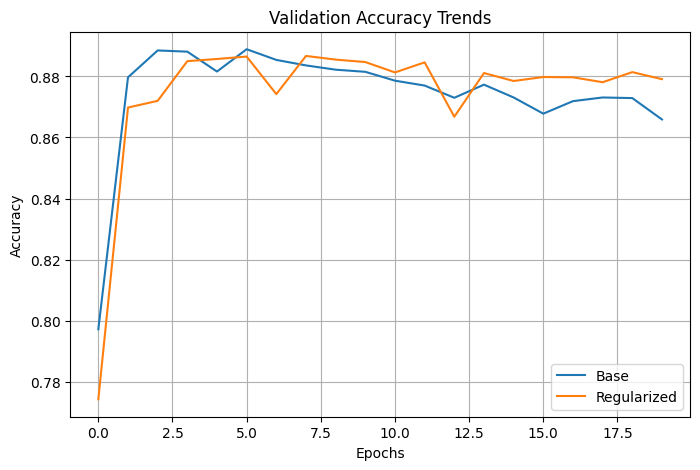

In [17]:
plt.figure(figsize=(8,5))
plt.plot(base_hist.history['val_accuracy'], label='Base')
plt.plot(hist_reg.history['val_accuracy'], label='Regularized')
plt.title("Validation Accuracy Trends")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()




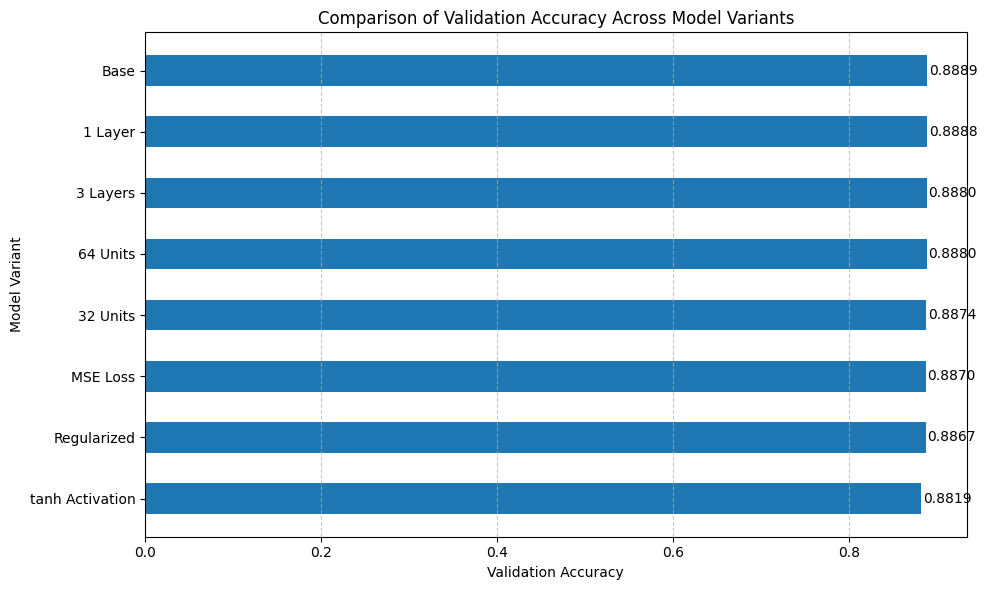

In [18]:
# Sort models by validation accuracy (highest to lowest)
sorted_results = dict(sorted(results_summary.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,6))
bars = plt.barh(list(sorted_results.keys()), list(sorted_results.values()), height=0.5)

# Add accuracy labels to each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2,
             f"{list(sorted_results.values())[i]:.4f}", va='center')

# Styling and labels
plt.xlabel("Validation Accuracy")
plt.ylabel("Model Variant")
plt.title("Comparison of Validation Accuracy Across Model Variants")
plt.gca().invert_yaxis()  # Show highest accuracy on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
